In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("cleaned_data.csv")



In [3]:
df2=pd.read_csv("plane-data.csv")

In [4]:
df1.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12


In [5]:
df2.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.shape

(5029, 9)

In [7]:
df1.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut'],
      dtype='object')

In [8]:
df2.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [9]:
#selecting only required  columns
df1 = df1.loc[:,['Year','TailNum','ArrDelay']]
df2 = df2.loc[:,['tailnum','year']]

In [10]:
#remove nan values in df2
df2.head()

,tailnum,year
0,N050AA,NaN
1,N051AA,NaN
2,N052AA,NaN
3,N054AA,NaN
4,N055AA,NaN


In [11]:
df2=df2.dropna(subset = ['year', 'tailnum',])


In [12]:
df2.shape


(4480, 2)

In [13]:
df2.isnull().sum() #all nan values have been removed


tailnum    0
year       0
dtype: int64

In [14]:
#Rename columns to merge with ease
df2 = df2.rename({'tailnum':'TailNum', 'year': 'Manu_year'}, axis = 1)
df2.head()

,TailNum,Manu_year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998


In [15]:
#merging the datasets
q2 = pd.merge(df1, df2, how = "inner", on = "TailNum")
q2.head()

,Year,TailNum,ArrDelay,Manu_year
0,2006,N657AW,6.0,1999
1,2006,N657AW,-5.0,1999
2,2006,N657AW,-10.0,1999
3,2006,N657AW,-2.0,1999
4,2006,N657AW,-2.0,1999


In [16]:
q2.shape

(11919264, 4)

In [17]:
#consider only delays greater than 0
q2 = q2[q2["ArrDelay"]>0]

In [18]:
q2.min(axis=0) 


Year           2006
TailNum      N10156
ArrDelay        1.0
Manu_year      0000
dtype: object

In [19]:
q2.max(axis=0)

Year           2007
TailNum      N999DN
ArrDelay     2598.0
Manu_year      None
dtype: object

In [20]:
#get rid of erronous values in Manu_Year
q2 = q2.loc[(q2["Manu_year"] != '0000') & (q2["Manu_year"] != 'None')]
q2.shape

(5442901, 4)

In [23]:
# Q3 Do Older planes suffer more delays?



In [22]:
#First lets calcuate the planes age
q2['Age'] = q2['Year']-q2['Manu_year'].astype(int)
q2['Age'].value_counts().sort_values(ascending=False)

 5     450349
 6     439081
 4     415220
 7     408195
 3     374659
 8     364788
 2     300122
 9     247500
 1     233635
 19    176010
 16    174703
 15    173397
 10    167501
 11    160522
 18    157875
 17    155256
 12    145509
 14    144381
 20    135209
 13    132304
 21    119575
 22     79375
 0      78035
 39     27304
 23     24396
 38     24138
 28     14975
 24     13940
 27     13620
 31     13549
 40     11120
 29     11002
 30     10775
 37     10178
 32      7626
 26      4830
 25      3878
 33      2527
 34      2322
 36      2249
 41      1538
 44      1493
 43      1409
 48      1232
 47      1199
 42      1180
-1        810
 35       694
 45       682
 50       518
 49       393
 51       123
Name: Age, dtype: int64

In [24]:
#get rid of ages less than 0
q2 = q2.loc[(q2["Age"] != -1)]


In [25]:
q2['Age'].min()

0

In [26]:
q2['Age'].max()

51

In [32]:
group =q2.groupby(["Age"])["ArrDelay"].mean()
group =group.reset_index()
group

,Age,ArrDelay
0,0,32.152162
1,1,31.913587
2,2,32.026409
3,3,31.905076
4,4,32.571935
5,5,31.489223
6,6,31.203703
7,7,31.866623
8,8,32.195086
9,9,33.221689


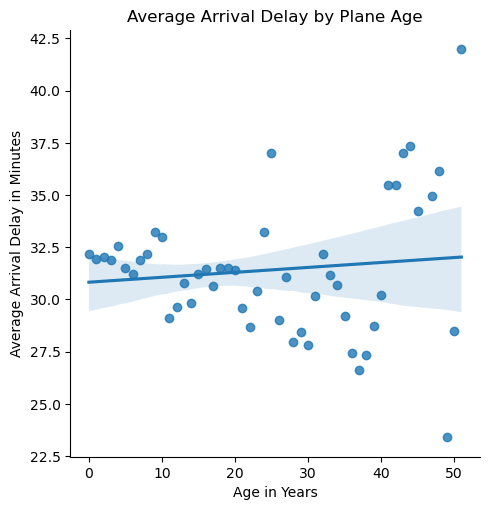

In [78]:
#a scatterplot can be constructed for this
sns.lmplot(data = group, x="Age",y="ArrDelay")
plt.title('Average Arrival Delay by Plane Age')
plt.xlabel('Age in Years')
plt.ylabel('Average Arrival Delay in Minutes')
plt.savefig("C:/Users/ACER/Programming 2nd semester/Coursework/Pictures/LMplotQ2.png",bbox_inches='tight')

In [41]:
#calcluate the correlation value
group["Age"].corr(group["ArrDelay"])

0.11143602075245536

In [ ]:
#0.11  there is a weak positve correlation between Age and Arr Delay

In [ ]:
#lets assume that age<30 is old and age>30 is new

In [70]:
new_plane = q2[q2['Age']<=30]
old_plane = q2[q2['Age']>30 ]

In [71]:
new_plane = new_plane['ArrDelay'].mean()
old_plane = old_plane['ArrDelay'].mean()

In [77]:
print('The Average Arrival Delay of New Planes is',new_plane ,'minutes')
print('The Average Arrival Delay of Old Planes is', old_plane ,'minutes')

The Average Arrival Delay of New Planes is 31.516048705056093 minutes
The Average Arrival Delay of Old Planes is 29.43096147980695 minutes
